# Tarea: Construcción de DataFrames y Análisis Estadístico con Pandas

## Análisis de Variables de servicios Militares en la segunda guerra mundial
Se exploraran las variables relacionadas con el servicio militar de soldados, proporcionando detalles sobre su ingreso, tiempo de servicio, estado final y edad. Las variables incluidas son:

* **edad de ingreso**: Edad a la que el soldado ingresó al servicio militar, variando entre 18 y 40 años.
* **fecha de salida**: Fecha aproximada en la que el soldado dejó el ejército, que puede ser entre 2 y 6 años después del ingreso si sobrevivió, o una fecha específica si falleció en acción, cuya fecha estimda pueden ser dias o aproxidamente 2 años.
* **fecha_nac**: Fecha de nacimiento del soldado, limitada entre 1900 y 1925.
* **fecha_ing**: Fecha de ingreso al servicio militar, restringida al período entre 1939 y 1945.
* **estado_final**: Booleano que indica si el soldado falleció (true) o sobrevivió (false).
* **tiempo de vida**: Tiempo que el soldado sobrevivió en batalla, relevante solo si el estado_final es true.
* **rango**: Rango militar del soldado durante su servicio.

Este conjunto de datos proporciona una base para analizar la demografía y la experiencia militar de soldados en un contexto histórico específico, permitiendo investigaciones sobre la edad de reclutamiento, la duración del servicio, y los resultados finales de los soldados en función de su rango y período de servicio.

In [24]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

 ## Número de muestras aleatorias

In [26]:
limite=3000

### Funcion que genera fechas aleatorias entre n1 y n2

In [28]:
def random_date(n1,n2):
    inicio = datetime(n1, 1, 1)
    final =  datetime(n2, 12, 31)
    return (inicio + (final - inicio) *np.random.rand())

In [42]:
fecha_nac=[]
fecha_ing=[]
edad_ingreso=[]
fecha_salida=[]

estado_final=[]
tiempo_vida=[]
rango=[]
puestos=[ "Soldado", "Cabo", "Sargento", "Teniente", "Capitán", "Mayor","Mariscal"]

## Calculo de los datos aleatorios
$Edad_{\text{ingreso}}=Año_{\text{ingreso}}-Año_{\text{nacimiento}}$


$Fecha_{\text{salida}}=$ $ \left\{ \begin{array}{lcc} Fecha_{\text{ingreso}}+k \hspace{0.2cm} , k\in [2 \text{ años}, 7 \text{ años}] & si & Estado_{\text{final}} = 1 \\ \\ Fecha_{\text{ingreso}}+k \hspace{0.2cm} , k\in [0 \text{ años}, 2 \text{ años}] & si & Estado_{\text{final}} = 0\end{array} \right.$


$Tiempo_{\text{vida}}=$
$ \left\{ \begin{array}{lcc} Fecha_{\text{salida}}-Fecha_{\text{ingreso}} & si & Estado_{\text{final}} = 1 \\ \\ \text{NaN} & si & Estado_{\text{final}} = 0\end{array} \right.$

In [44]:


for i in range(limite):
    
    fecha_nac.append(random_date(1900,1921))
    
    fecha_ing.append(random_date(1939,1945))
    
    edad_ingreso.append( int(fecha_ing[i].year-fecha_nac[i].year))
    
    rango.append(np.random.choice(puestos))
    
    estado_final.append(np.random.randint(0,2))

    if estado_final[i]:
        
        fecha_salida.append( fecha_ing[i]+timedelta(days=np.random.randint(365*2,365*7)))
        
        tiempo_vida.append(float('nan'))
    else:
        fecha_salida.append(fecha_ing[i]+timedelta(days=np.random.randint(10,365*2)))
        
        tiempo_vida.append(fecha_salida[i]-fecha_ing[i])
    
    


# Data Frame

In [46]:
datos={
    "Fecha Nac":fecha_nac,
    "Fecha Ing":fecha_ing,
    "Edad Ing":edad_ingreso,
    "Rango":rango,
    "Estado Final":estado_final,
    "Fecha Salida":fecha_salida,
    "Tiempo de Vida":tiempo_vida,
}

soldados=pd.DataFrame(datos)
#Formatear el tiempo de vida a dias
soldados['Tiempo de Vida']=soldados['Tiempo de Vida'] / np.timedelta64(1, 'D')
soldados

,Fecha Nac,Fecha Ing,Edad Ing,Rango,Estado Final,Fecha Salida,Tiempo de Vida
0,1902-11-22 15:00:31.437054,1939-08-18 04:35:57.173607,37,Capitán,1,1941-08-26 04:35:57.173607,NaN
1,1910-11-04 18:02:54.344032,1944-01-15 21:32:35.137741,34,Soldado,0,1944-10-17 21:32:35.137741,276.0
2,1904-07-27 01:52:51.243249,1943-02-13 15:21:41.646390,39,Mariscal,0,1943-10-07 15:21:41.646390,236.0
3,1910-04-21 20:11:53.256039,1944-06-07 17:07:58.475461,34,Capitán,1,1950-02-21 17:07:58.475461,NaN
4,1903-10-09 19:56:53.761860,1945-01-24 01:04:34.375808,42,Soldado,0,1945-05-16 01:04:34.375808,112.0
...,...,...,...,...,...,...,...
2995,1903-12-24 01:41:52.053415,1939-08-04 09:14:22.473670,36,Capitán,1,1943-07-06 09:14:22.473670,NaN
2996,1909-11-14 06:27:34.270014,1939-01-06 09:54:59.653828,30,Teniente,1,1944-12-25 09:54:59.653828,NaN
2997,1905-01-05 21:13:20.170581,1940-11-13 19:36:42.919887,35,Sargento,1,1944-11-04 19:36:42.919887,NaN
2998,1902-05-15 04:13:38.374025,1942-01-07 19:40:37.879739,40,Mariscal,0,1943-12-06 19:40:37.879739,698.0


In [48]:
soldados.describe()

,Fecha Nac,Fecha Ing,Edad Ing,Estado Final,Fecha Salida,Tiempo de Vida
count,3000,3000,3000.000000,3000.000000,3000,1482.000000
mean,1911-02-24 16:38:45.679713280,1942-07-05 12:48:12.392354304,31.354667,0.506000,1945-04-23 17:08:21.992354176,375.991228
min,1900-01-01 17:52:46.841249,1939-01-01 02:19:20.568542,18.000000,0.000000,1939-01-28 11:25:38.975196,10.000000
25%,1905-08-21 11:37:07.985610240,1940-09-30 09:40:26.841845504,26.000000,0.000000,1943-02-06 20:17:31.110298496,191.250000
50%,1911-01-18 07:17:02.858473216,1942-07-16 00:26:12.363577088,31.000000,1.000000,1945-04-25 14:05:37.639747968,392.000000
75%,1916-08-24 02:23:48.343758080,1944-04-12 15:31:29.130606976,37.000000,1.000000,1947-03-15 22:05:05.094432256,556.000000
max,1921-12-28 17:13:28.122179,1945-12-30 15:14:17.882677,45.000000,1.000000,1952-09-13 21:31:50.905551,729.000000
std,NaN,NaN,6.652841,0.500047,NaN,209.518652


## Resumen estadistico para variables categoricas

### Resumen de rangos

In [52]:
soldados['Rango'].value_counts()

Rango
Teniente    446
Sargento    445
Capitán     441
Mayor       428
Cabo        426
Mariscal    419
Soldado     395
Name: count, dtype: int64

### Resumen de soldados sobrevimientes

In [54]:
soldados['Estado Final'].value_counts()

Estado Final
1    1518
0    1482
Name: count, dtype: int64

## Histograma

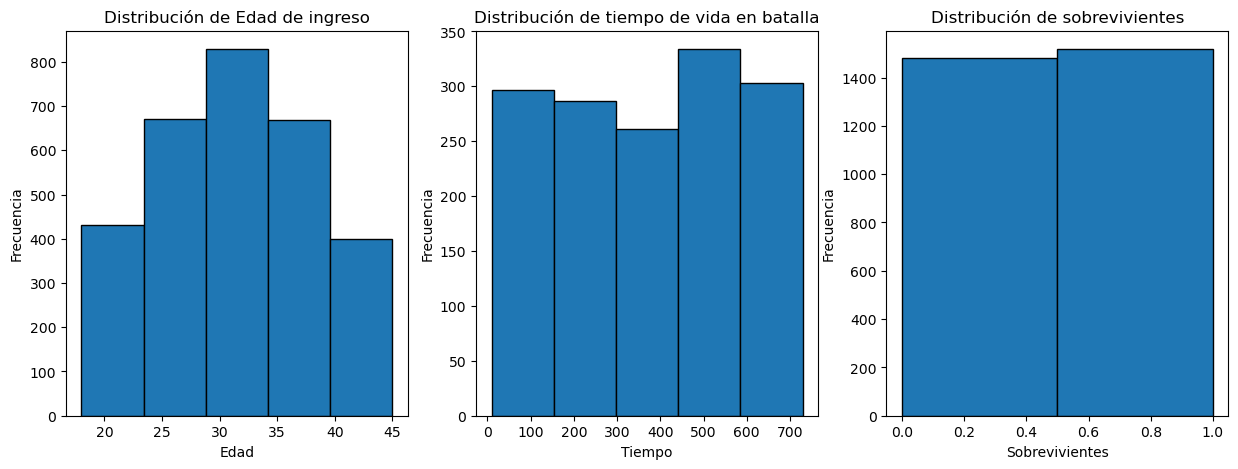

In [56]:
#histograma para la edad 
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 3, 1)  # Subplot 1 de 3
plt.hist(soldados['Edad Ing'], bins=5, edgecolor='black')
plt.title('Distribución de Edad de ingreso')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


#histograma para el tiempo de vida

plt.subplot(1, 3, 2)  # Subplot 1 de 3
plt.hist(soldados['Tiempo de Vida'], bins=5, edgecolor='black')
plt.title('Distribución de tiempo de vida en batalla')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)  # Subplot 1 de 3
plt.hist(soldados['Estado Final'], bins=2, edgecolor='black')
plt.title('Distribución de sobrevivientes')
plt.xlabel('Sobrevivientes')
plt.ylabel('Frecuencia')
plt.show()

